<a href="https://colab.research.google.com/github/krisana-y/229352-StatisticalLearning/blob/main/lab02_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #2

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# For Fashion-MNIST
from tensorflow.keras.datasets import fashion_mnist

# For 20 Newsgroups
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## Part 1: Marketing Campaign Dataset - Manual Data Preprocessing & Logistic Regression

### Load the Marketing Campaign Dataset ([Data Information](https://archive.ics.uci.edu/dataset/222/bank+marketing))

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (`'yes'`) or not (`'no'`) subscribed.

In [17]:
# URL for the raw Bank Marketing dataset CSV
bank_url = 'https://raw.githubusercontent.com/donlap/ds352-labs/main/bank.csv'

# Load the dataset
# - sep=';' is crucial as it's semicolon-separated
# - na_values=['unknown'] converts 'unknown' strings to NaN
df = pd.read_csv(bank_url, sep=';', na_values=['unknown'])
df = df.drop(["emp.var.rate", "cons.price.idx", "cons.conf.idx",	"euribor3m", "nr.employed"], axis=1)
print("Shape of the dataset:", df.shape)
df.head()

Shape of the dataset: (41188, 16)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no


### Data Exploration

In [18]:
# Check for missing values
print("--- Missing Values Count ---")
print(df.isnull().sum())

--- Missing Values Count ---
age               0
job             330
marital          80
education      1731
default        8597
housing         990
loan            990
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64


In [19]:
# Check unique values and counts for categorical columns
print("--- Unique Values for Categorical Columns ---")
for col in df.select_dtypes(include='object').columns:
    print(f"\n'{col}' unique values:")
    print(df[col].value_counts(dropna=False)) # Include NaN counts

--- Unique Values for Categorical Columns ---

'job' unique values:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
NaN                330
Name: count, dtype: int64

'marital' unique values:
marital
married     24928
single      11568
divorced     4612
NaN            80
Name: count, dtype: int64

'education' unique values:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
NaN                     1731
illiterate                18
Name: count, dtype: int64

'default' unique values:
default
no     32588
NaN     8597
yes        3
Name: count, dtype: int64

'housing' unique values:
housing
yes    21576
no     18622
NaN      990
Name: count, dtype: int64


### Data Preprocessing

In [20]:
# Map target variable 'y' to 0 (no) and 1 (yes)
df['y'] = df['y'].map({'yes':1,'no':0}) # Write your code here

# Calculate class statistics
print(df['y'].describe())

# Drop 'duration' due to data leakage
df = df.drop('duration', axis=1)

# Define features (X) and target (y)
y = df['y']
X = df.drop('y', axis=1)

# Split the data BEFORE any transformations
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Print data shape
print(X_train.shape,X_train.shape)



count    41188.000000
mean         0.112654
std          0.316173
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64
(28831, 14) (28831, 14)


We will apply `StandardScaler()`, `OrdinalEncoder()`, and `OneHotEncoder()` on a few selected columns.

**1. Numerical Feature: `age` and `campaign` (Standard Scaling)**

In [22]:
# Select the columns for demonstration
num_cols_demo = ['age', 'campaign']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training data
scaler.fit(X_train[num_cols_demo])

# Transform both training and test data
X_train_scaled_demo = scaler.transform(X_train[num_cols_demo]) # Write your code here
X_test_scaled_demo = scaler.transform(X_test[num_cols_demo]) # Write your code here

Let's take a look at the transformed `age` and `campaign` features and their statistics.

In [23]:
print("\nOriginal X_train 'age' and 'campaign' head:")
print(X_train[num_cols_demo].head())
print("\nScaled X_train 'age' and 'campaign' head:")
print(pd.DataFrame(X_train_scaled_demo, columns=num_cols_demo, index=X_train.index).head())

print("\nMean of scaled 'age' (train):", X_train_scaled_demo[:, 0].mean())
print("Std Dev of scaled 'campaign' (train):", X_train_scaled_demo[:, 1].std())


Original X_train 'age' and 'campaign' head:
       age  campaign
33441   28         1
19807   36         1
32480   29         3
14608   56         2
15295   49         1

Scaled X_train 'age' and 'campaign' head:
            age  campaign
33441 -1.152017 -0.569245
19807 -0.387902 -0.569245
32480 -1.056502  0.156849
14608  1.522386 -0.206198
15295  0.853786 -0.569245

Mean of scaled 'age' (train): -6.802046237376007e-17
Std Dev of scaled 'campaign' (train): 1.0


**2. Ordinal Feature: `education` (Ordinal Encoding with Imputation)**

- **Imputation**

In [24]:
# Select the column for demonstration
ord_col_demo = ['education']

# Step 1: Impute missing values using SimpleImputer (most frequent strategy)
imputer_ord = SimpleImputer(strategy='most_frequent')

# Fit imputer only on training data
imputer_ord.fit(X_train[ord_col_demo])

# Fit imputer only on training AND test data
X_train_imputed_ord_demo = imputer_ord.transform(X_train[ord_col_demo]) # Write your code here
X_test_imputed_ord_demo = imputer_ord.transform(X_test[ord_col_demo]) # Write your code here

In [25]:
X_train_imputed_ord_demo

array([['professional.course'],
       ['professional.course'],
       ['basic.9y'],
       ...,
       ['professional.course'],
       ['university.degree'],
       ['basic.9y']], dtype=object)

- **Ordinal Encoding**

In [26]:
# Define the order for the 'education' ordinal feature
education_categories = [
    'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',
    'professional.course', 'university.degree', 'masters', 'doctorate'
]

In [27]:
# Step 2: Initialize OrdinalEncoder with the predefined categories
ordinal_encoder = OrdinalEncoder(categories=[education_categories])

# Fit the encoder ONLY on the imputed training data
ordinal_encoder.fit(X_train_imputed_ord_demo)

# Transform both imputed training and test data
X_train_ord_encoded_demo = ordinal_encoder.transform(X_train_imputed_ord_demo)
X_test_ord_encoded_demo = ordinal_encoder.transform(X_test_imputed_ord_demo)

Let's take a look at the imputed and ordinal-encoded `education`.

In [28]:
print("\nOriginal X_train 'education' head:")
print(X_train[ord_col_demo].iloc[20:25])
print("\nImputed X_train 'education' head (after imputer.transform):")
print(pd.DataFrame(X_train_imputed_ord_demo, columns=ord_col_demo, index=X_train.index).iloc[20:25])
print("\nOrdinal Encoded X_train 'education' head:")
print(pd.DataFrame(X_train_ord_encoded_demo, columns=ord_col_demo, index=X_train.index).iloc[20:25])


Original X_train 'education' head:
                 education
9157              basic.4y
14407             basic.9y
37323    university.degree
1022   professional.course
9044   professional.course

Imputed X_train 'education' head (after imputer.transform):
                 education
9157              basic.4y
14407             basic.9y
37323    university.degree
1022   professional.course
9044   professional.course

Ordinal Encoded X_train 'education' head:
       education
9157         1.0
14407        3.0
37323        6.0
1022         5.0
9044         5.0


**3. Nominal Feature: `job` (One-Hot Encoding with Imputation)**

- **Imputation**

In [29]:
# Select the column for demonstration
nom_col_demo = ['job']

# Step 1: Impute missing values using SimpleImputer (most frequent strategy)
imputer_nom = SimpleImputer(strategy='most_frequent')
imputer_nom.fit(X_train[nom_col_demo]) # Fit imputer only on training data

X_train_imputed_nom_demo = imputer_nom.transform(X_train[nom_col_demo])
X_test_imputed_nom_demo = imputer_nom.transform(X_test[nom_col_demo])

- **Nominal Encoding**

In [31]:
# sparse_output=False ensures a dense NumPy array is returned, easier for viewing
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder ONLY on the imputed training data
onehot_encoder.fit(X_train_imputed_nom_demo)

# Transform both imputed training and test data
X_train_onehot_encoded_demo = onehot_encoder.transform(X_train_imputed_nom_demo)
X_test_onehot_encoded_demo =  onehot_encoder.transform(X_test_imputed_nom_demo)

In [32]:
print("\nOriginal X_train 'job' head:")
print(X_train[nom_col_demo].iloc[40:45])
print("\nImputed X_train 'job' head (after imputer.transform):")
print(pd.DataFrame(X_train_imputed_nom_demo, columns=nom_col_demo, index=X_train.index).iloc[40:45])
print("\nOne-Hot Encoded X_train 'job' shape:", X_train_onehot_encoded_demo.shape)
print("First 5 rows of One-Hot Encoded X_train 'job':")
print(pd.DataFrame(X_train_onehot_encoded_demo, columns=onehot_encoder.get_feature_names_out(nom_col_demo), index=X_train.index).iloc[40:45])


Original X_train 'job' head:
                 job
16804  self-employed
37268    blue-collar
22862     technician
5305          admin.
37057     unemployed

Imputed X_train 'job' head (after imputer.transform):
                 job
16804  self-employed
37268    blue-collar
22862     technician
5305          admin.
37057     unemployed

One-Hot Encoded X_train 'job' shape: (28831, 11)
First 5 rows of One-Hot Encoded X_train 'job':
       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  job_management  job_retired  job_self-employed  job_services  job_student  job_technician  job_unemployed
16804         0.0              0.0               0.0            0.0             0.0          0.0                1.0           0.0          0.0             0.0             0.0
37268         0.0              1.0               0.0            0.0             0.0          0.0                0.0           0.0          0.0             0.0             0.0
22862         0.0              0.0       

### **Exercise 1: Apply All Preprocessing & Train Logistic Regression**

Now, it's your turn to apply these preprocessing steps to *all* relevant columns and then train a Logistic Regression model.

**Instructions:**

1.  Look at the Variable Table in [this link](https://archive.ics.uci.edu/dataset/222/bank+marketing).
2. Make lists for `numerical_features`, `ordinal_features`, and `nominal_features`.
3. Preprocess the features. It is safer to make a copy of `X_train` using:
   ```
   X_train_copy = X_train.copy()
   X_test_copy = X_test.copy()
   ```
   and preprocess `X_train_copy` instead.

   **For nominal features, concat the one-hot encoded features using [`pd.concat(..., axis=1)`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) and drop the old nominal features from the dataframe.**
4. Train Logistic Regression on the preprocessed `X_train_copy` and `y_train`.
5. Evaluate the Model:
    *   Make predictions on the preprocessed `X_test_copy`.
    *   Print `classification_report` ([Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)). What are the accuracy, average precision, average recall, and average f1-score?


In [43]:
# Make copies to avoid modifying the original DataFrames
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# Define feature lists based on the provided link and dataset columns
numerical_features = ['age', 'campaign', 'pdays', 'previous']
ordinal_features = ['education']
nominal_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Preprocessing
# 1. Numerical Features (Standard Scaling)
scaler = StandardScaler()
X_train_copy[numerical_features] = scaler.fit_transform(X_train_copy[numerical_features])
X_test_copy[numerical_features] = scaler.transform(X_test_copy[numerical_features])

# 2. Ordinal Features (Imputation + Ordinal Encoding)
imputer_ord = SimpleImputer(strategy='most_frequent')
X_train_copy[ordinal_features] = imputer_ord.fit_transform(X_train_copy[ordinal_features])
X_test_copy[ordinal_features] = imputer_ord.transform(X_test_copy[ordinal_features])

education_categories = [
    'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',
    'professional.course', 'university.degree', 'masters', 'doctorate'
]
ordinal_encoder = OrdinalEncoder(categories=[education_categories])
X_train_copy[ordinal_features] = ordinal_encoder.fit_transform(X_train_copy[ordinal_features])
X_test_copy[ordinal_features] = ordinal_encoder.transform(X_test_copy[ordinal_features])


# 3. Nominal Features (Imputation + One-Hot Encoding)
imputer_nom = SimpleImputer(strategy='most_frequent')
X_train_copy[nominal_features] = imputer_nom.fit_transform(X_train_copy[nominal_features])
X_test_copy[nominal_features] = imputer_nom.transform(X_test_copy[nominal_features])

onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Use sparse_output=False for dense array

# Fit and transform on training data
X_train_nominal_encoded = onehot_encoder.fit_transform(X_train_copy[nominal_features])
X_test_nominal_encoded = onehot_encoder.transform(X_test_copy[nominal_features])

# Create DataFrames from one-hot encoded arrays with appropriate column names
X_train_nominal_encoded_df = pd.DataFrame(X_train_nominal_encoded, columns=onehot_encoder.get_feature_names_out(nominal_features), index=X_train_copy.index)
X_test_nominal_encoded_df = pd.DataFrame(X_test_nominal_encoded, columns=onehot_encoder.get_feature_names_out(nominal_features), index=X_test_copy.index)


# Concatenate the one-hot encoded features and drop the original nominal features
X_train_copy = pd.concat([X_train_copy.drop(nominal_features, axis=1), X_train_nominal_encoded_df], axis=1)
X_test_copy = pd.concat([X_test_copy.drop(nominal_features, axis=1), X_test_nominal_encoded_df], axis=1)


# Ensure columns match between train and test after one-hot encoding (important if handle_unknown='ignore')
# Add missing columns to test set and fill with 0
missing_cols = set(X_train_copy.columns) - set(X_test_copy.columns)
for c in missing_cols:
    X_test_copy[c] = 0
# Ensure the order of columns is the same
X_test_copy = X_test_copy[X_train_copy.columns]


print("\nShape of preprocessed X_train_copy:", X_train_copy.shape)
print("Shape of preprocessed X_test_copy:", X_test_copy.shape)

# Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
log_reg.fit(X_train_copy, y_train)

# Evaluate the Model
y_pred = log_reg.predict(X_test_copy)

# Print classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Extract specific metrics from the report
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = report['accuracy']
# 'weighted avg' provides a metric considering the support (number of true instances for each label)
average_precision = report['weighted avg']['precision']
average_recall = report['weighted avg']['recall']
average_f1_score = report['weighted avg']['f1-score']

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Average Precision (weighted): {average_precision:.4f}")
print(f"Average Recall (weighted): {average_recall:.4f}")
print(f"Average F1-score (weighted): {average_f1_score:.4f}")


Shape of preprocessed X_train_copy: (28831, 45)
Shape of preprocessed X_test_copy: (12357, 45)

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10992
           1       0.65      0.19      0.29      1365

    accuracy                           0.90     12357
   macro avg       0.78      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357


Accuracy: 0.8988
Average Precision (weighted): 0.8783
Average Recall (weighted): 0.8988
Average F1-score (weighted): 0.8730


## Part 2: Fashion-MNIST Dataset - Image Classification

### Load Fashion-MNIST Dataset

The Fashion-MNIST dataset consists of 28x28 grayscale images of fashion items.

In [33]:
# Load the dataset
(fm_X_train, fm_y_train), (fm_X_test, fm_y_test) = fashion_mnist.load_data()

print(f"Fashion-MNIST Train data shape: {fm_X_train.shape}")
print(f"Fashion-MNIST Train labels shape: {fm_y_train.shape}")
print(f"Fashion-MNIST Test data shape: {fm_X_test.shape}")
print(f"Fashion-MNIST Test labels shape: {fm_y_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Fashion-MNIST Train data shape: (60000, 28, 28)
Fashion-MNIST Train labels shape: (60000,)
Fashion-MNIST Test data shape: (10000, 28, 28)
Fashion-MNIST Test labels shape: (10000,)


In [34]:
print(f"First image {fm_X_train[0]}")
print(f"First label {fm_y_train[0]}")

First image [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   

### Visualize Fashion-MNIST Images

Let's see what these images look like.

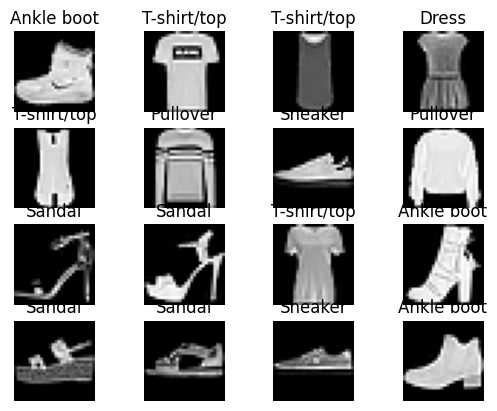

In [37]:
# Define class names (for better understanding)
fashion_mnist_class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Visualize the images
fig, axes = plt.subplots(4, 4)
for i, ax in enumerate(axes.flat):
    ax.imshow(fm_X_train[i], cmap='gray')
    ax.set_title(fashion_mnist_class_names[fm_y_train[i]])
    ax.axis('off')

### **Exercise 2: Preprocessing Images (Flatten and Scale)**

Images are 2D arrays (matrices of pixels) and pixel values are integers from 0-255. For Logistic Regression, we need:
*  **Flattening:** Convert each 28x28 image into a 1D array of 784 features.
*  **Scaling:** Normalize pixel values from [0, 255] to [0, 1].

**Instructions:**

1.   **Flatten:** Use the `.reshape()` method (see [documentation](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.reshape.html)). For `fm_X_train_binary` (shape `(num_samples, 28, 28)`), you want to reshape it to `(num_samples, 28*28)`.
2.  **Scale:** Divide the flattened pixel values by 255.0 to get values between 0 and 1.
3.   **Train Logistic Regression:**
    *   Initialize `LogisticRegression(solver='saga')`. `saga` is a good solver when both number of samples and number of features are large.
    *   Fit the model on your *processed* `fm_X_train_scaled` and `fm_y_train`.
4.   **Make Predictions:** Use `predict()` to make predictions on the *processed* `fm_X_test_scaled`.
5.   **Print Classification Report:** Print `classification_report` ([Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)). What are the accuracy, average precision, average recall, and average f1-score?
6.   **Visualize Misclassifications:**
    *   Find the indices in `fm_X_test_binary` where your model made incorrect predictions (i.e., `fm_y_pred != fm_y_test`).
    *   Select 5 of these misclassified images.
    *   Plot these images (using `plt.imshow`). For each image, print its true label and its predicted label.

In [ ]:
# Flatten the images
fm_X_train_binary = fm_X_train.reshape(fm_X_train.shape[0], 28 * 28)
fm_X_test_binary = fm_X_test.reshape(fm_X_test.shape[0], 28 * 28)

# Scale the pixel values
fm_X_train_scaled = fm_X_train_binary / 255.0
fm_X_test_scaled = fm_X_test_binary / 255.0

print(f"Flattened and scaled Train data shape: {fm_X_train_scaled.shape}")
print(f"Flattened and scaled Test data shape: {fm_X_test_scaled.shape}")
print(f"First scaled image values:\n{fm_X_train_scaled[0][:10]}") # Print first 10 values

# Train Logistic Regression Model
log_reg_fashion = LogisticRegression(solver='saga', max_iter=1000) # Added max_iter for convergence
log_reg_fashion.fit(fm_X_train_scaled, fm_y_train)

# Make Predictions
fm_y_pred = log_reg_fashion.predict(fm_X_test_scaled)

# Print Classification Report
print("\n--- Fashion-MNIST Classification Report ---")
print(classification_report(fm_y_test, fm_y_pred, target_names=fashion_mnist_class_names))

# Visualize Misclassifications
# Find indices of misclassified images
misclassified_indices = np.where(fm_y_pred != fm_y_test)[0]

# Select a few misclassified images (e.g., 5)
num_misclassified_to_show = 5
if len(misclassified_indices) > 0:
    selected_misclassified_indices = np.random.choice(misclassified_indices, min(num_misclassified_to_show, len(misclassified_indices)), replace=False)

    plt.figure(figsize=(10, 4))
    for i, idx in enumerate(selected_misclassified_indices):
        plt.subplot(1, num_misclassified_to_show, i + 1)
        plt.imshow(fm_X_test[idx], cmap='gray')
        true_label = fashion_mnist_class_names[fm_y_test[idx]]
        predicted_label = fashion_mnist_class_names[fm_y_pred[idx]]
        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo misclassified images found to display.")

Flattened and scaled Train data shape: (60000, 784)
Flattened and scaled Test data shape: (10000, 784)
First scaled image values:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Part 3: 20 Newsgroups Dataset - Text Classification

### Load 20 Newsgroups Dataset

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics.

In [39]:
# Load the training and testing data
news_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
news_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)

X_train_news, y_train_news = news_train.data, news_train.target
X_test_news, y_test_news = news_test.data, news_test.target

print(f"Number of training documents: {len(X_train_news)}")
print(f"Number of test documents: {len(X_test_news)}")
print(f"Categories: {news_train.target_names}")

Number of training documents: 11314
Number of test documents: 7532
Categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


### Explore Sample Document

In [40]:
# Print the first document and its class
## Write your code here
X_train_news[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

### Preprocessing: Text Vectorization Demonstration with `TfidfVectorizer`

$$
\text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)
$$

Where:

$$
\text{TF}(t, d) = \frac{\text{number of word }t\text{ in } d}{\text{number of words in } d} \quad \text{ and } \quad
\text{IDF}(t, D) = \log\left(\frac{\text{total number of documents}}{\text{number of documents that contain word }t}\right).
$$

In [41]:
# Create a small list of sentences for demonstration
sample_sentences = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

# Initialize TfidfVectorizer for demonstration
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the sample sentences
# The output `sample_vec_output` will be a sparse matrix
sample_vec_output_sparse = vectorizer.fit_transform(sample_sentences)

# Convert to a dense NumPy array for easier viewing
sample_vec_output_dense = sample_vec_output_sparse.toarray()

print("\nVocabulary (word to index mapping):")
print(vectorizer.vocabulary_)

print("\nFeature names (words):")
print(vectorizer.get_feature_names_out())

print("\nTF-IDF matrix for sample sentences (dense format):")
print(sample_vec_output_dense)


Vocabulary (word to index mapping):
{'document': 0, 'second': 1}

Feature names (words):
['document' 'second']

TF-IDF matrix for sample sentences (dense format):
[[1.         0.        ]
 [0.78722298 0.61666846]
 [0.         0.        ]
 [1.         0.        ]]


### **Exercise 3: Apply TF-IDF Vectorization to Full Dataset**

Now, apply `TfidfVectorizer` to the actual training and testing datasets for the 20 Newsgroups classification task.

**Instructions:**

1.  **Initialize `TfidfVectorizer`:**
    *   Initialize `TfidfVectorizer`. Use `stop_words='english'` to remove common words.
2.  **Fit and Transform Training Data:**
    *   Call `fit_transform()` on `X_train_news` to learn the vocabulary and transform the training text into TF-IDF features. Store the result in `X_train_vec`.
3.  **Transform Test Data:**
    *   Call `transform()` on `X_test_news` using the *already fitted* vectorizer. Store the result in `X_test_vec`. **Crucially, do not call `fit_transform()` on the test data!** This would cause data leakage.
4.  **Initialize Logistic Regression:**
    *   Initialize `LogisticRegression(solver='saga')`. `saga` is a good solver when both number of samples and number of features are large.
5.  **Train the Model:**
    *   Fit the model on your `X_train_vec` and `y_train_news`.
6.  **Make Predictions:**
    *   Make predictions using `predict()` on the `X_test_vec`.
7.  **Evaluate the Model:**
    *   Print `classification_report` ([Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)). What are the accuracy, average precision, average recall, and average f1-score?

In [ ]:
# --- YOUR CODE FOR EXERCISE 3 STARTS HERE ---


